In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
device_nb = 0
os.environ["CUDA_VISIBLE_DEVICES"]=str(device_nb)

In [2]:
import pandas as pd
import math
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.stats
import random

In [3]:
########################################################
#raw data
########################################################



#subject_id = '38A'
blood_analyte = 'CGM'

xl = pd.ExcelFile('CGM_insulin_TG_data.xlsx')
Meal_dfs = xl.parse(blood_analyte)
sub_meal_idx = {}

sub_LBM = {'38A': 39.47,
           '38B': 62.78,
           '38C': 53.5,
           '38D': 37.47,
           '38E': 45.52,
           '38F': 43.38,
           '38H': 47.39,}

X=[]
Y1=[]
Y2=[]
Y3=[]

for index, row in Meal_dfs.iterrows():
    
    #ignore missing meals
    if not math.isnan(row.tolist()[6]):

        #get each subject's meal index
        for subject_id in ['38A', '38B', '38C', '38D', '38E', '38F', '38H']:
            if row['Patient_ID'] == subject_id:
                if subject_id in sub_meal_idx:
                    sub_meal_idx[subject_id] += [index]
                else:
                    sub_meal_idx[subject_id] = [index]
        
        
        
        
    X += [np.float32(one_cgm) for one_cgm in row.tolist()[2:34]]

    #carbs
    if row['Meal_ID'][4]== '1':
        Y1 += [np.float32(52.25/sub_LBM[row[0]])]
        #Y1 += [np.float32(1)]
    elif row['Meal_ID'][4]== '2':
        Y1 += [np.float32(94.75/sub_LBM[row[0]])]
        #Y1 += [np.float32(2)]
    elif row['Meal_ID'][4]== '3':
        Y1 += [np.float32(179.75/sub_LBM[row[0]])]
        #Y1 += [np.float32(3)]

    #protein
    if row['Meal_ID'][1]== '1':
        Y2 += [np.float32(15/sub_LBM[row[0]])]
        #Y2 += [np.float32(1)]
    elif row['Meal_ID'][1]== '2':
        Y2 += [np.float32(30/sub_LBM[row[0]])]
        #Y2 += [np.float32(2)]
    elif row['Meal_ID'][1]== '3':
        Y2 += [np.float32(60/sub_LBM[row[0]])]
        #Y2 += [np.float32(3)]

    #fat
    if row['Meal_ID'][7]== '1':
        Y3 += [np.float32(13/sub_LBM[row[0]])]    
        #Y3 += [np.float32(1)]  
    elif row['Meal_ID'][7]== '2':
        Y3 += [np.float32(26/sub_LBM[row[0]])]   
        #Y3 += [np.float32(2)]  
    elif row['Meal_ID'][7]== '3':
        Y3 += [np.float32(52/sub_LBM[row[0]])]  
        #Y3 += [np.float32(3)]



X_value = np.array(X).reshape(63,32)
scaler = StandardScaler()
X_value = scaler.fit_transform(X_value)
Y1_value = np.array(Y1).reshape(-1,1)
Y2_value = np.array(Y2).reshape(-1,1)
Y3_value = np.array(Y3).reshape(-1,1)

#Y1 = (Y1 - Y1.min())/(Y1.max()-Y1.min())
#Y2 = (Y2 - Y2.min())/(Y2.max()-Y2.min())
#Y3 = (Y3 - Y3.min())/(Y3.max()-Y3.min())

In [4]:
sub_meal_idx

{'38A': [0, 1, 2, 3, 4, 5, 6, 8],
 '38B': [10, 11, 12, 14, 15, 16, 17],
 '38C': [18, 20, 21, 22, 23, 24, 25, 26],
 '38D': [27, 28, 29, 30, 31, 32, 33, 34, 35],
 '38E': [36, 37, 38, 39, 40, 41, 42, 43, 44],
 '38F': [45, 46, 47, 48, 49, 50, 51, 52, 53],
 '38H': [54, 55, 56, 58, 59, 61, 62]}

In [5]:
########################################################
# 17 Gaussian AUC features (deprecated)
########################################################
"""
#A: miss 8
#B: miss 1, 5
#C: miss 2
#H: miss 4, 7
#the others: meal 1 2 3 4 5 6 7 8 9 

X_Gau = []


sub_letters = ['A', 'B', 'C', 'D', 'E', 'F', 'H']
      
for sub_l in sub_letters:
    
    if sub_l == 'A':
        miss_meal = [8]
    elif sub_l == 'B':
        miss_meal = [1, 5]
    elif sub_l == 'C':
        miss_meal = [2]
    elif sub_l == 'H':
        miss_meal = [4, 7]
    else:
        miss_meal = []
    
    with open('./Tianlong/Gauss Features 2018 1121/%s.txt'%sub_l, 'r') as f0:
        
        # each line is a meal
        for line_num in range(1,10):
            
            one_meal  = []
            
            if line_num in miss_meal:
                
                X_Gau.append(np.array([np.nan for nan_num in range(17)]))
                
            else:
                line = f0.readline()

                for number in line.split(' '):

                    one_meal += [float(number)]

                one_meal = np.array(one_meal)
                X_Gau += [one_meal]
                
X_Gau = np.array(X_Gau)
"""

"\n#A: miss 8\n#B: miss 1, 5\n#C: miss 2\n#H: miss 4, 7\n#the others: meal 1 2 3 4 5 6 7 8 9 \n\nX_Gau = []\n\n\nsub_letters = ['A', 'B', 'C', 'D', 'E', 'F', 'H']\n      \nfor sub_l in sub_letters:\n    \n    if sub_l == 'A':\n        miss_meal = [8]\n    elif sub_l == 'B':\n        miss_meal = [1, 5]\n    elif sub_l == 'C':\n        miss_meal = [2]\n    elif sub_l == 'H':\n        miss_meal = [4, 7]\n    else:\n        miss_meal = []\n    \n    with open('./Tianlong/Gauss Features 2018 1121/%s.txt'%sub_l, 'r') as f0:\n        \n        # each line is a meal\n        for line_num in range(1,10):\n            \n            one_meal  = []\n            \n            if line_num in miss_meal:\n                \n                X_Gau.append(np.array([np.nan for nan_num in range(17)]))\n                \n            else:\n                line = f0.readline()\n\n                for number in line.split(' '):\n\n                    one_meal += [float(number)]\n\n                one_meal = np.

In [6]:
########################################################
# 17 Gaussian AUC features
########################################################


data=pd.DataFrame(pd.read_excel('CGM_insulin_TG_data.xlsx'))


def process_data(data):
    sample_am = data.shape[0]
    protein = data.iloc[:, 1].values.reshape(-1, 1)
    cho = data.iloc[:, 2].values.reshape(-1, 1)
    fat = data.iloc[:, 3].values.reshape(-1, 1)
    # pudding_A = data_38A.iloc[:,4].values.reshape(-1,1)
    # water = data_38A.iloc[:,5].values.reshape(-1,1)
    total_e = data.iloc[:, 6].values.reshape(-1, 1)
    glucose = data.iloc[:, 2:35].values.reshape(sample_am, -1)
    #glucose_last_column = glucose[:, -1]
    #glucose_r = np.c_[glucose, glucose_last_column]
    return protein, cho, fat, total_e, glucose

def process_glucose(glucose):
    a = np.zeros((1, 5))
    for row in glucose:
        # print(glucose_gaussian_feature_4(row).shape())
        # print(glucose_gaussian_feature_8(row).shape())
        # print(glucose_gaussian_feature_16(row).shape())
        glucose_gaussian_feature = np.hstack([glucose_gaussian_feature_8(row)])
        a = np.vstack([a, glucose_gaussian_feature])
    # print(a.shape)
    a = np.delete(a, 0, axis=0)
    # print(a.shape)
    return a

def normal_function(mu, sigma, x):
    normal_function_value = (1 / (sigma * np.sqrt(2 * np.pi))) * \
        np.exp(-((x - mu) ** 2) / (2 * (sigma ** 2)))
    return normal_function_value

def glucose_gaussian_feature_4(glucose_row):
    gaussian_feature = []
    normal_g_1 = normal_function(
        0, 4/1.96, np.asarray([i for i in range(0, 5)])) * glucose_row[0:5]
    normal_g_2 = normal_function(
        4, 4/1.96, np.asarray([i for i in range(0, 9)])) * glucose_row[0:9]
    normal_g_3 = normal_function(
        8, 4/1.96, np.asarray([i for i in range(4, 13)])) * glucose_row[4:13]
    normal_g_4 = normal_function(
        12, 4/1.96, np.asarray([i for i in range(8, 17)])) * glucose_row[8:17]
    normal_g_5 = normal_function(
        16, 4/1.96, np.asarray([i for i in range(12, 21)])) * glucose_row[12:21]
    normal_g_6 = normal_function(
        20, 4/1.96, np.asarray([i for i in range(16, 25)])) * glucose_row[16:25]
    normal_g_7 = normal_function(
        24, 4/1.96, np.asarray([i for i in range(20, 29)])) * glucose_row[20:29]
    normal_g_8 = normal_function(
        28, 4/1.96, np.asarray([i for i in range(24, 33)])) * glucose_row[24:33]
    normal_g_9 = normal_function(
        32, 4/1.96, np.asarray([i for i in range(28, 33)])) * glucose_row[28:33]
    for i in range(1, 10):
        gaussian_feature.append(np.trapz(locals()["normal_g_" + str(i)]))
    return gaussian_feature

def glucose_gaussian_feature_8(glucose_row):
    gaussian_feature = []
    normal_g_1 = normal_function(
        0, 8/1.96, np.asarray([i for i in range(0, 9)])) * glucose_row[0:9]
    normal_g_2 = normal_function(
        8, 8/1.96, np.asarray([i for i in range(0, 17)])) * glucose_row[0:17]
    normal_g_3 = normal_function(
        16, 8/1.96, np.asarray([i for i in range(8, 25)])) * glucose_row[8:25]
    normal_g_4 = normal_function(
        24, 8/1.96, np.asarray([i for i in range(16, 33)])) * glucose_row[16:33]
    normal_g_5 = normal_function(
        32, 8/1.96, np.asarray([i for i in range(24, 33)])) * glucose_row[24:33]
    for i in range(1, 6):
        gaussian_feature.append(np.trapz(locals()["normal_g_" + str(i)]))
    return gaussian_feature

def glucose_gaussian_feature_16(glucose_row):
    gaussian_feature = []
    normal_g_1 = normal_function(
        0, 16/1.96, np.asarray([i for i in range(0, 17)])) * glucose_row[0:17]
    normal_g_2 = normal_function(
        16, 16/1.96, np.asarray([i for i in range(0, 33)])) * glucose_row[0:33]
    normal_g_3 = normal_function(
        32, 16/1.96, np.asarray([i for i in range(16, 33)])) * glucose_row[16:33]
    for i in range(1, 4):
        gaussian_feature.append(np.trapz(locals()["normal_g_" + str(i)]))
    return gaussian_feature


p,c,f,e,r=process_data(data)
newfeature=process_glucose(r)

X_Gau = newfeature

In [7]:
X_Gau.shape

(63, 5)

38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


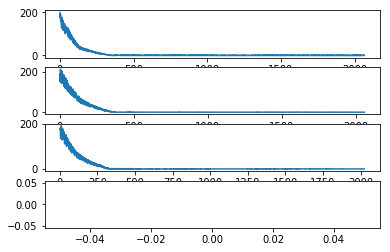

2 0.0005 0.001 0.001
{'38A': {'c': (-0.3571428, 0.3851207164708872), 'p': (-0.43085474, 0.28655712361989494), 'f': (-0.4158743, 0.3054783618616717)}}
c
[11.053997, 1.3850584, 1.4512333, 1.2521292, 2.9084444, 2.1905837, 2.1325884, 1.6839213] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[12.8354645, 0.75382066, 0.725796, 0.36371207, 2.0834498, 1.1043123, 0.9476371, 0.41346025] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[15.798417, 1.0253127, 0.8883241, 0.32833853, 2.2979991, 1.1220902, 0.84483546, 0.2187415] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
199.0569
211.91174
190.68033


/home/grads/g/guangzhou92/enter/envs/py36/lib/python3.6/site-packages/tensorflow/python/client/session.py:1662: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


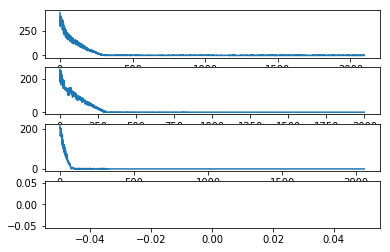

2 0.0005 0.001 0.005
{'38A': {'c': (-0.4381745, 0.2775258791681658), 'p': (-0.44573447, 0.26834758631260536), 'f': (-0.48347518, 0.2248422974208177)}}
c
[26.908768, 0.45792434, 0.5876529, 0.7230092, 0.8406684, 0.94772583, 1.0717162, 1.1865773] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[14.16075, 0.019265775, 0.1832993, 0.35327023, 0.50781214, 0.58031875, 0.7005497, 0.76417094] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[2.4007132, 0.6052372, 0.56399375, 0.64213777, 0.6440047, 0.66456616, 0.64350694, 0.68603146] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
437.7949
256.568
214.33864
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


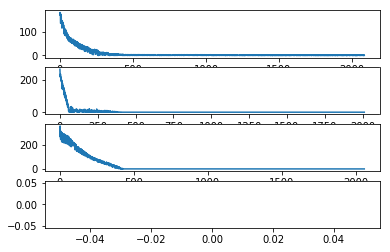

2 0.0005 0.005 0.001
{'38A': {'c': (-0.45594692, 0.2561923676505679), 'p': (0.39443237, 0.3335649251929771), 'f': (-0.44231993, 0.27247417295164833)}}
c
[9.733657, 0.996386, 0.59078574, 0.72472084, 0.8413129, 0.9614702, 1.0746297, 1.1819994] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[-3.1681614, 1.231744, 0.7807733, 0.8871874, 0.8856944, 0.81374615, 0.88648635, 0.9128313] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[61.245064, 0.41962498, 0.042992186, 0.17333283, 0.27363718, 0.3959302, 0.49595523, 0.57028884] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
184.17624
265.3289
354.5321
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


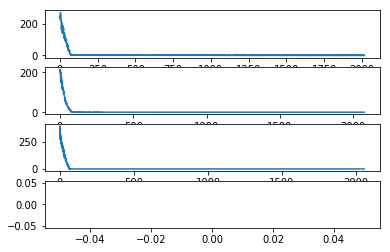

2 0.0005 0.005 0.005
{'38A': {'c': (0.11174248, 0.7922203880322736), 'p': (0.1246986, 0.7686026038340126), 'f': (-0.83991027, 0.009065111180129534)}}
c
[0.10905344, 0.23281808, 0.3603144, 0.4819579, 0.60471976, 0.72089535, 0.829357, 0.94776183] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[0.3313314, 0.7818075, 0.72615695, 0.8744079, 0.91104853, 0.7574681, 0.8878791, 0.9307039] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[0.65360105, 0.61863947, 0.5769603, 0.66025174, 0.6678466, 0.65232253, 0.6525438, 0.6729851] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
272.29956
215.11986
396.79495
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


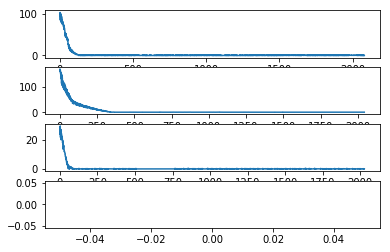

2 0.001 0.001 0.001
{'38A': {'c': (0.09315025, 0.8263509774438274), 'p': (-0.44315058, 0.2714674362346407), 'f': (-0.7658442, 0.026723599016965128)}}
c
[2.4692237, 3.3182225, 2.3896148, 2.09869, 2.5740416, 2.8425605, 2.296227, 2.2711105] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[10.615111, 0.7201419, 0.80600107, 0.983666, 0.74082994, 0.8453146, 0.991006, 0.9499161] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[0.75361764, 0.68064535, 0.53367406, 0.5885626, 0.7899173, 0.6553039, 0.6564483, 0.74167514] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
103.609406
167.36696
29.62302
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


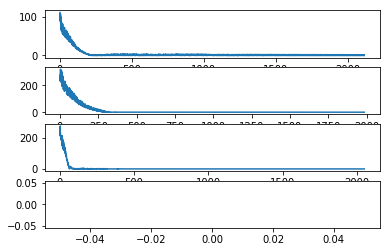

2 0.001 0.001 0.005
{'38A': {'c': (0.015145961, 0.9716056655670842), 'p': (-0.44686177, 0.2669920555494047), 'f': (0.3975192, 0.32944984156930657)}}
c
[1.0285099, 0.8909933, 1.115875, 1.3804004, 1.5549104, 1.7290643, 1.8656957, 1.9663156] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[11.082581, 0.14590992, 0.30147108, 0.45576426, 0.5845988, 0.6535713, 0.7533147, 0.8061276] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[-1.9912405, 0.32796076, 0.54881454, 0.64838386, 0.6685263, 0.67585415, 0.6398559, 0.70622295] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
110.810616
321.46057
273.6196
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


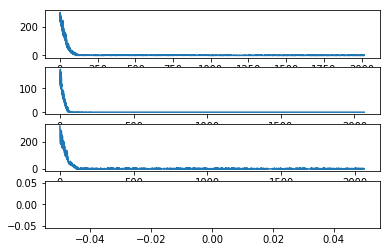

2 0.001 0.005 0.001
{'38A': {'c': (0.5999905, 0.11584730603851646), 'p': (0.83538586, 0.009820240309699184), 'f': (0.86984295, 0.004988327090347702)}}
c
[0.015084749, 0.12700221, 8.820445, 0.41710964, 0.53326094, 3.1052303, 0.81527424, 0.9082244] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[0.49621874, 0.7413121, 1.439127, 0.69204533, 0.67238265, 0.9764257, 0.75753194, 0.6599059] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[0.5228301, 0.43656093, 9.206358, 0.31951734, 0.26014027, 2.7631226, 0.24225359, 0.22861485] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
301.83182
180.73161
319.15894
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


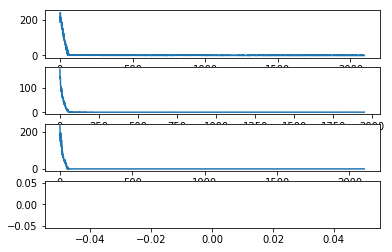

2 0.001 0.005 0.005
{'38A': {'c': (0.12877318, 0.7612062356484814), 'p': (-0.019859608, 0.9627730242359915), 'f': (-0.7325163, 0.038759755906058645)}}
c
[0.31571782, 0.5727966, 0.80617076, 1.0520905, 1.2672069, 1.4681623, 1.6386211, 1.7961648] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[0.61279714, 0.83529824, 0.7762309, 0.7958296, 0.83830523, 0.77011484, 0.8968252, 0.86300963] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[0.66408366, 0.6454915, 0.56201166, 0.71841985, 0.6915075, 0.6500706, 0.6678598, 0.6774802] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
241.72878
174.55177
231.68987
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


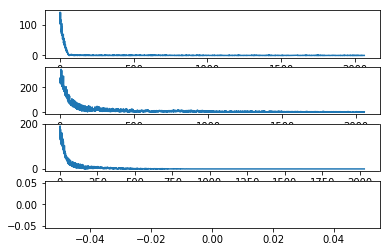

2 0.005 0.001 0.001
{'38A': {'c': (0.6586957, 0.07568893444399544), 'p': (0.17579444, 0.6771133405086005), 'f': (-0.10407471, 0.8062644539246646)}}
c
[2.6107485, 0.74386597, 4.3850484, 1.9876246, 3.5767798, 3.298808, 2.4581347, 1.8629947] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[21.15802, 0.48684004, 20.114922, 3.7915382, 9.203822, 5.183661, 1.8075414, 0.25519687] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[5.750477, 0.41208968, 2.4534059, 0.42920703, 1.0259433, 0.77720886, 0.53369176, 0.40964767] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
139.87025
346.6752
191.14581
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


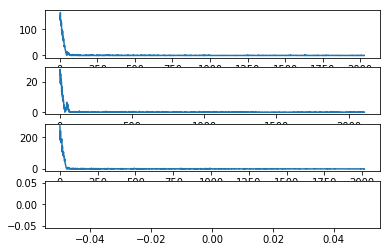

2 0.005 0.001 0.005
{'38A': {'c': (0.72709894, 0.04097864479284871), 'p': (0.5783854, 0.13311352323704576), 'f': (0.91354865, 0.0015123848093519547)}}
c
[1.4327312, 3.3949304, 4.658601, 3.0772278, 3.5385869, 3.0961754, 2.6713386, 1.8682542] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[0.4211071, 1.1711465, 1.5053782, 0.69466746, 1.0603518, 0.8917106, 0.93049955, 0.59398645] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[-1.3294078, 2.300957, 6.183441, 2.0262594, 0.82968533, 1.1121674, -0.29655135, 0.23869348] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
163.61723
28.418077
270.56024
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


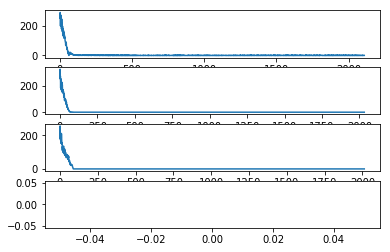

2 0.005 0.005 0.001
{'38A': {'c': (0.29518595, 0.47783708336064945), 'p': (-0.28388324, 0.49562509721705655), 'f': (-0.22800148, 0.5870819041266122)}}
c
[1.0043814, 1.875638, 2.1108875, 2.4431338, 2.2698994, 2.2543004, 2.3673463, 2.3748975] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[0.70123243, 0.8533705, 0.7828579, 0.8898994, 0.84789085, 0.76527786, 0.91087383, 0.8259804] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[0.5353172, 0.58080363, 0.5745394, 0.61141056, 0.64187163, 0.65843016, 0.66041094, 0.6919768] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
292.89914
324.13156
254.95769
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


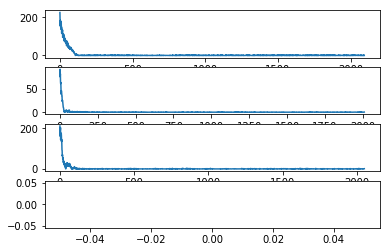

2 0.005 0.005 0.005
{'38A': {'c': (-0.07324782, 0.8631507870091875), 'p': (0.35818195, 0.3836389197159961), 'f': (0.570046, 0.1401384850931385)}}
c
[3.5382137, 2.5485659, 1.069346, 1.8364713, 3.8267443, 2.8553975, 2.01643, 2.1544416] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[0.90214664, 1.0286072, 1.1229882, 0.6656289, 0.60908526, 1.1019053, 1.1022158, 0.91173255] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[-0.6354054, 2.9005647, 2.9581108, 1.8116583, -1.6677538, 0.3629656, 1.6551775, 0.46234488] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
225.59892
90.86876
210.88504
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


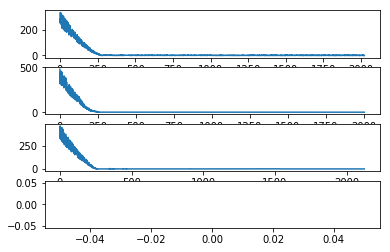

3 0.0005 0.001 0.001
{'38A': {'c': (-0.30233392, 0.46672048787900766), 'p': (-0.45409772, 0.2583724995035129), 'f': (-0.4084354, 0.3150900030638955)}}
c
[4.9547615, 0.3002089, 0.75406015, 0.5422551, 1.4837501, 0.7808561, 0.89503354, 1.0058074] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[2.9773796, -0.062718704, 0.3328347, 0.25618917, 0.9377713, 0.4552374, 0.56848747, 0.6109984] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[5.3932796, 0.01676822, 0.50613916, 0.18495394, 1.1928198, 0.28170013, 0.31614345, 0.37310913] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
337.24622
477.0121
468.49768
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


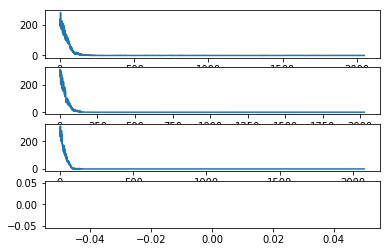

3 0.0005 0.001 0.005
{'38A': {'c': (0.6612638, 0.07415490697561512), 'p': (0.62337244, 0.09867498425800002), 'f': (0.52761805, 0.1789814955362608)}}
c
[2.3373742, 2.0614994, 4.0744143, 2.3041701, 3.0371652, 3.5491028, 2.1407685, 1.9597344] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[0.7733505, 0.70480704, 1.2540104, 0.68242246, 1.1022369, 0.9201335, 0.7592388, 0.6684015] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[0.6124196, 0.47268185, 0.8977008, 0.52997243, 0.8460491, 0.89683974, 0.42160293, 0.4936564] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
283.4391
314.49817
311.70486
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


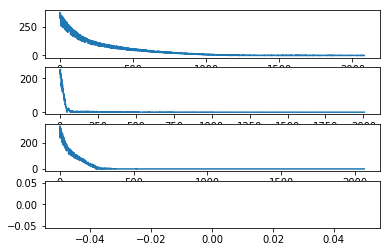

3 0.0005 0.005 0.001
{'38A': {'c': (-0.3127623, 0.4506915275707997), 'p': (0.12862688, 0.7614715354235285), 'f': (-0.33661216, 0.4149075326286514)}}
c
[89.02969, 59.532898, 26.98249, 8.378609, 4.4581413, 1.7413657, 3.1334748, 2.7359874] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[1.6559839, 2.802814, 1.8860766, 0.24818826, 1.8768768, 0.8664885, 0.3187067, 0.6795001] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[4.8941493, 4.5469375, 0.68178624, 0.46496326, 0.75512177, 0.5177752, 0.59585047, 0.63203824] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
372.74142
252.53276
330.39172
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


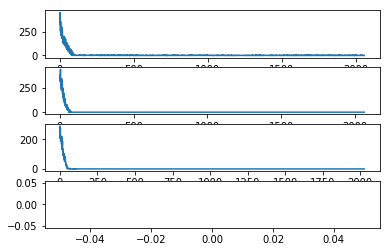

3 0.0005 0.005 0.005
{'38A': {'c': (0.109485745, 0.7963488523826819), 'p': (-0.39994773, 0.3262291530971695), 'f': (0.057989594, 0.891513024842571)}}
c
[0.7297197, 0.85099465, 0.964614, 1.1024638, 1.2149303, 1.3167925, 1.4234082, 1.5126824] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[0.74077797, 0.88083637, 0.75940025, 0.9097834, 0.8661887, 0.7869743, 0.88919795, 0.88937986] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[0.4419872, 0.6456648, 0.5846564, 0.6503098, 0.660109, 0.6720689, 0.6119927, 0.6972393] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
458.09656
439.5622
290.14453
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


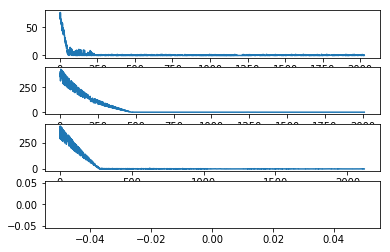

3 0.001 0.001 0.001
{'38A': {'c': (-0.0010820148, 0.9979712239119294), 'p': (-0.43644056, 0.2796524215200396), 'f': (-0.35486585, 0.3883764125155911)}}
c
[2.4254818, 2.9380555, 2.7634804, 2.488708, 2.4317217, 2.5014608, 3.5254881, 2.8436766] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[85.172005, 1.1261832, 0.837131, 0.8299744, 1.4938958, 0.9098381, 1.1212101, 0.858696] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[9.374908, 0.5885299, 0.5870168, -0.3533972, 3.615288, 0.9118375, -0.0646373, -0.52763355] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
76.205765
434.76514
408.4275
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


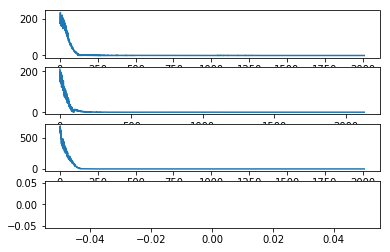

3 0.001 0.001 0.005
{'38A': {'c': (0.7852663, 0.020938350788348093), 'p': (0.34889194, 0.39697536195628974), 'f': (0.26770568, 0.5215180991242144)}}
c
[1.4573501, 2.8536303, 3.0643916, 2.148889, 3.737721, 3.2358787, 2.3498433, 1.9999809] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[0.01704219, 0.96162516, 0.9048292, 0.70782614, 1.3479635, 0.84554815, 0.84455055, 0.6742884] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[0.500299, 0.6318552, 0.63582987, 0.4722138, 0.95500386, 0.77760506, 0.5075541, 0.47222254] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
234.18727
210.8281
684.04846
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


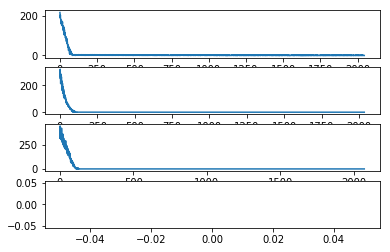

3 0.001 0.005 0.001
{'38A': {'c': (0.123741, 0.770343121351108), 'p': (0.18534936, 0.6603473713139003), 'f': (-0.039279737, 0.9264262146196649)}}
c
[0.06899589, 0.33431163, 0.59448826, 0.8282057, 1.0234699, 1.2587893, 1.4458976, 1.6121281] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[0.40294883, 0.7822614, 0.7969305, 0.871849, 0.89451, 0.78731555, 0.9306057, 0.8683267] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[0.2587003, 0.38145238, 0.44353738, 0.5443968, 0.6020602, 0.62654895, 0.63911915, 0.665302] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
217.05885
318.58887
442.74512
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


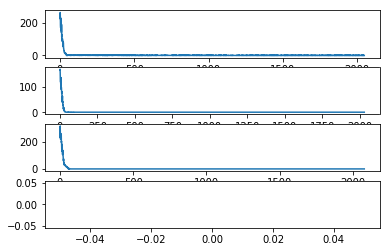

3 0.001 0.005 0.005
{'38A': {'c': (0.14467336, 0.7324987644453704), 'p': (-0.78627366, 0.02066190757241846), 'f': (-0.7660435, 0.026659770956974756)}}
c
[0.8592198, 1.0774553, 1.2877817, 1.5302117, 1.6800596, 1.8289953, 1.9293388, 2.0188591] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[0.8141537, 0.86528456, 0.7759229, 0.8495519, 0.87019277, 0.76852685, 0.9050052, 0.8437611] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[0.6491937, 0.6451419, 0.568287, 0.63496125, 0.68074477, 0.68900734, 0.6719457, 0.68368334] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
265.45544
170.38553
318.036
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


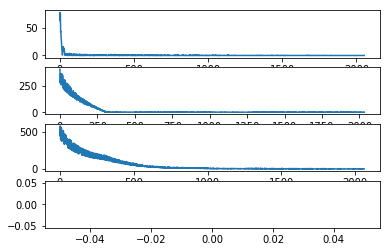

3 0.005 0.001 0.001
{'38A': {'c': (0.8592823, 0.006251548229639945), 'p': (-0.45948195, 0.2520505105509876), 'f': (-0.31021228, 0.45458999713171105)}}
c
[2.4127991, 2.413099, 3.9236946, 1.8801548, 3.3142114, 2.6906428, 2.2929077, 1.8222437] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[20.067898, -0.12848788, -0.16595298, -0.8255436, 2.3706331, 1.1632346, 2.0018814, -0.20680207] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[139.17679, 52.99647, 21.58347, 5.8797235, 7.9346046, 3.3289957, 1.6388671, 0.08162391] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
77.02729
405.71173
579.92126
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


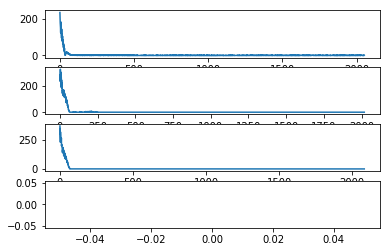

3 0.005 0.001 0.005
{'38A': {'c': (0.18068768, 0.6685122485193222), 'p': (-0.07959904, 0.8513810309316869), 'f': (0.09369522, 0.8253469123744579)}}
c
[0.74403656, 3.3684673, 2.120275, 2.4668798, 2.2744343, 2.2841177, 2.363077, 2.4455323] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[0.55013406, 4.1725926, 0.6894294, 0.7673525, 0.8136157, 0.7916474, 0.83440083, 0.83846164] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[0.23017326, 1.3660815, 0.57219833, 0.6388637, 0.6217871, 0.6770888, 0.66323674, 0.7233643] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
236.58054
327.4518
369.76694
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


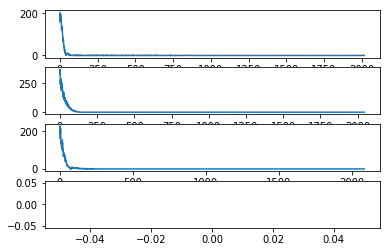

3 0.005 0.005 0.001
{'38A': {'c': (0.8394279, 0.009143798567668107), 'p': (0.11513415, 0.7860236369639946), 'f': (0.22868732, 0.5859265585319182)}}
c
[2.463555, 2.5902135, 3.782596, 2.1266928, 3.9093738, 3.0853388, 2.3525727, 1.7586783] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[0.8652872, 0.8681362, 1.2183809, 0.63872945, 1.6095397, 0.7132262, 0.83840495, 0.63101137] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[0.24892482, 0.7211481, 0.5733144, 0.669137, 0.80735093, 0.7441676, 0.7002713, 0.6426609] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
203.91763
370.14502
227.76503
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


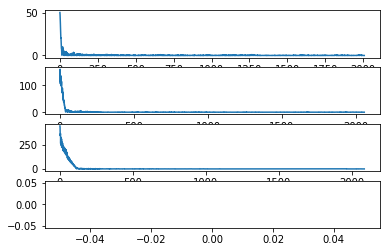

3 0.005 0.005 0.005
{'38A': {'c': (0.8608706, 0.006049815594515766), 'p': (-0.3753408, 0.3595402915605601), 'f': (0.46368, 0.24717596508105763)}}
c
[2.5845263, 3.007585, 4.362097, 2.0160892, 4.958695, 3.1526573, 2.0766628, 1.7678571] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[1.2356288, -1.0803303, -0.25604534, 0.29326522, 0.96022624, 0.5258063, 0.80009866, 0.66393995] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[1.6963723, 2.9995732, 2.9928658, -0.0073717833, 0.5242541, 1.0778131, 0.49592817, 0.8627225] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
50.364223
159.40205
442.26862
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


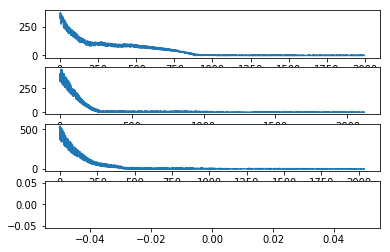

4 0.0005 0.001 0.001
{'38A': {'c': (-0.20157184, 0.632165648700403), 'p': (0.4660515, 0.24444357003911277), 'f': (-0.13261463, 0.7542474993823551)}}
c
[89.4564, 96.217735, 45.43141, 5.4106646, -2.0544086, 0.93639445, 2.7191777, 2.928935] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[3.3947453, -7.664717, 14.86525, -0.4798549, 6.272509, 1.9188442, 0.9303695, 0.17204116] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[41.54623, -5.8792953, 14.614444, 0.95618033, 7.6582894, 1.9709679, 0.6146089, 0.504649] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
376.49664
451.9756
541.8843
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


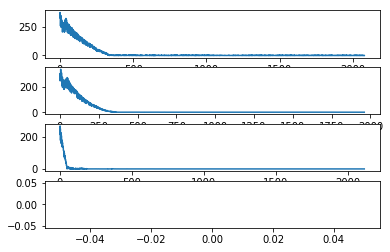

4 0.0005 0.001 0.005
{'38A': {'c': (-0.4437666, 0.2707220257978316), 'p': (-0.4286324, 0.28932703671120397), 'f': (0.8117588, 0.014410040459222173)}}
c
[44.49593, 4.2744374, 1.6732914, 1.2866842, 1.3555224, 1.9083666, 1.8515787, 1.9486108] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[32.737137, 2.3260193, 1.2411772, 0.6553681, 0.61159384, 1.0483873, 0.89851725, 0.8661277] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[-0.47550106, 0.88848245, 1.8494523, 0.40682226, 0.24123096, 1.1082761, 0.63637847, 0.61795634] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
373.93805
341.79095
270.02206
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


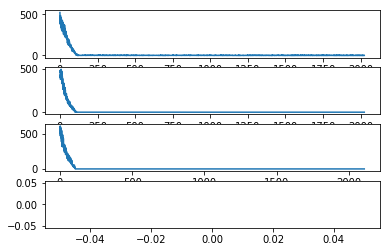

4 0.0005 0.005 0.001
{'38A': {'c': (0.10559788, 0.8034709356417371), 'p': (0.005767534, 0.9891861135249974), 'f': (-0.14190735, 0.7374742487659358)}}
c
[0.24248214, 0.36666462, 0.48841715, 0.6097349, 0.7274779, 0.849509, 0.95882905, 1.073029] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[0.53441167, 0.8715975, 0.7844638, 0.8612875, 0.8457336, 0.76672244, 0.9449097, 0.8598357] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[0.47704378, 0.53594345, 0.5536304, 0.6033951, 0.633809, 0.64966273, 0.6471274, 0.69668037] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
522.4877
493.17828
608.49493
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


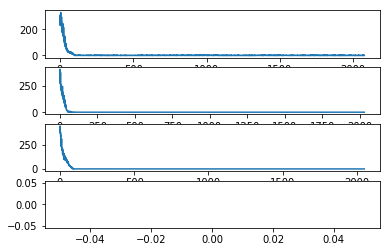

4 0.0005 0.005 0.005
{'38A': {'c': (0.60937, 0.1087701816031984), 'p': (0.8370695, 0.009534750747958228), 'f': (0.7534025, 0.03089760120691891)}}
c
[0.14064948, 0.17644948, 4.401624, 1.270714, 1.6017692, 3.1973555, 1.0362035, 0.6853419] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[0.2685639, 0.3811641, 1.4478811, 0.81921196, 0.9389602, 1.2523355, 0.74035895, 0.5398183] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[-0.16089748, -0.09795377, 1.578496, 0.56165946, 0.6929384, 1.1174593, 0.5002364, 0.50781405] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
328.05692
406.37988
442.8147
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


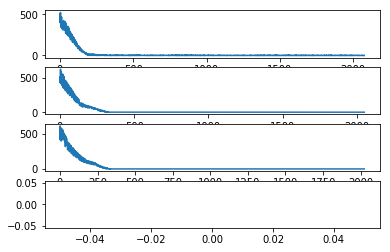

4 0.001 0.001 0.001
{'38A': {'c': (0.38449314, 0.3469760888043076), 'p': (-0.43889388, 0.276645929883039), 'f': (-0.4433643, 0.2712087176905493)}}
c
[-3.8233266, 0.561106, 0.79304516, 1.0374416, 1.2729505, 1.4737853, 1.626764, 1.7756025] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[25.752613, 0.2693415, 0.37323034, 0.49853185, 0.6047464, 0.6562547, 0.75729614, 0.79787254] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[31.830858, 0.24035996, 0.31768137, 0.41392812, 0.5034754, 0.5675007, 0.61604947, 0.6615263] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
521.97327
627.7911
612.7376
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


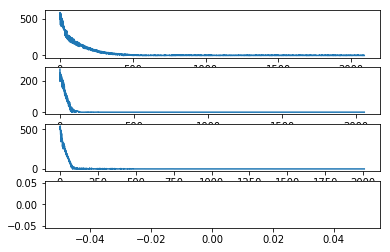

4 0.001 0.001 0.005
{'38A': {'c': (-0.47168127, 0.23801871372500089), 'p': (-0.63690436, 0.08945149553864407), 'f': (-0.22726823, 0.5883179426064258)}}
c
[53.386387, 11.793421, -0.350408, -0.19056022, -0.061751924, 0.07456968, 3.1806662, 1.2462027] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[1.1850559, 0.721666, 0.53765434, 0.6390175, 0.7168559, 0.7204595, 0.7879814, 0.84727263] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[2.0024874, 0.85896635, 0.5952329, 0.7328148, 0.7546528, 0.86742437, 0.6450056, 0.005597353] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
587.4912
273.8508
542.6149
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


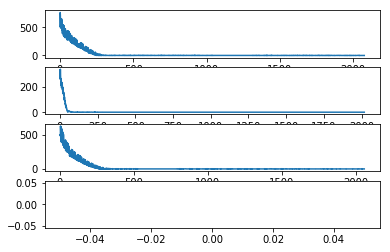

4 0.001 0.005 0.001
{'38A': {'c': (0.6674375, 0.07054239885440992), 'p': (0.49728748, 0.20990244935727478), 'f': (0.8794899, 0.003989403492307021)}}
c
[0.35784885, 0.5300274, 4.090436, 0.9951789, 1.1808944, 1.3343633, 1.496253, 1.6285106] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[0.43932357, 0.72095597, 1.22804, 0.81270134, 0.7895333, 0.6607923, 0.85682106, 0.8285588] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[-0.07696172, 0.00037937396, 4.18604, 0.22647367, 0.27804944, 0.32012174, 0.34711033, 0.3837116] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
763.8884
342.39474
624.49457
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


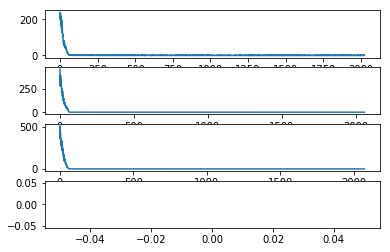

4 0.001 0.005 0.005
{'38A': {'c': (0.16024414, 0.7046460934577495), 'p': (0.07970721, 0.8511807684148986), 'f': (-0.08354398, 0.8440823929434772)}}
c
[1.0062733, 1.2158629, 1.4300001, 1.6369243, 1.7661027, 1.891094, 1.989396, 2.0726643] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[0.47251952, 0.79916775, 0.78334695, 0.85133153, 0.8848716, 0.7476908, 0.91902506, 0.86034673] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[0.42073572, 0.643777, 0.5549337, 0.6367384, 0.64823294, 0.64418286, 0.63999486, 0.73956466] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
237.94453
455.99527
510.06775
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


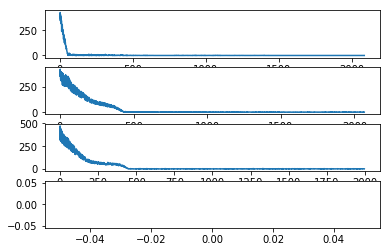

4 0.005 0.001 0.001
{'38A': {'c': (-0.1847263, 0.6614369836582421), 'p': (-0.4289988, 0.28886947505691474), 'f': (-0.43137315, 0.2859128433894259)}}
c
[10.598506, 3.6600087, 2.8213062, 1.8442402, 5.0253925, 2.4368465, 2.4569852, 1.8166976] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[74.40924, -0.345662, 0.13762414, 2.1184478, -0.8739525, 3.4888334, 2.9806087, 0.60920805] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[55.6422, 2.100973, 1.449419, 0.08329934, -2.5702653, -1.5458957, 1.2033713, 2.0653148] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
428.21863
423.30914
472.78677
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


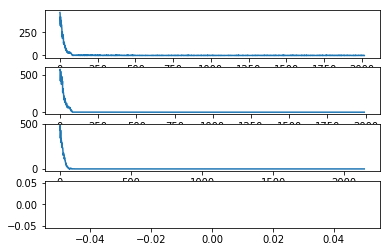

4 0.005 0.001 0.005
{'38A': {'c': (0.29943693, 0.4712133510728151), 'p': (-0.036801737, 0.9310590220423952), 'f': (0.040128663, 0.9248394919765816)}}
c
[1.1335915, 2.1541843, 2.174044, 2.4107168, 2.213019, 2.2757885, 2.2831626, 2.3059912] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[0.11866246, 2.0611873, 0.4224616, 0.5553792, 0.666927, 0.7186557, 0.7925081, 0.832975] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[0.27948895, 1.7023506, 0.5725977, 0.68705595, 0.63951886, 0.65316975, 0.66793334, 0.7583904] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
464.9337
572.1699
478.16696
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


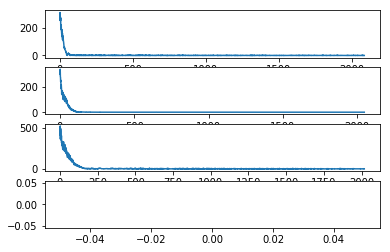

4 0.005 0.005 0.001
{'38A': {'c': (0.061050717, 0.8858140225087605), 'p': (0.5418792, 0.16534819989574884), 'f': (0.010925598, 0.9795161330799577)}}
c
[4.5108376, 1.3737493, 2.6428123, 1.5756202, 3.4691641, 4.5035067, 2.2257695, 1.7159581] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[0.16776605, 0.6778217, 0.8567401, 0.67749697, 1.2058852, 1.1580108, 0.853207, 0.60060525] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[8.5856085, 1.9547579, 3.8950927, 1.136894, 4.518917, 5.2581396, 0.43446183, -1.013807] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
308.6167
338.72546
522.9187
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


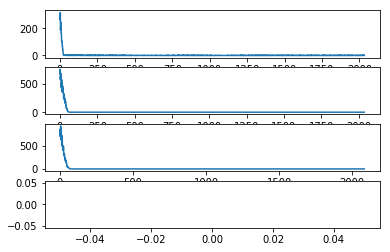

4 0.005 0.005 0.005
{'38A': {'c': (0.2419706, 0.5637032211910744), 'p': (-0.10632756, 0.8021333366103287), 'f': (-0.7641001, 0.02728632985728535)}}
c
[1.7163754, 2.164364, 2.2376962, 2.4442966, 2.327068, 2.357936, 2.3323421, 2.435415] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[0.618974, 0.8526939, 0.76376426, 0.89220554, 0.83074933, 0.7761175, 0.9197031, 0.8350716] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[0.6524252, 0.6778876, 0.57952803, 0.66747546, 0.6141908, 0.65544844, 0.68133324, 0.7052188] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
316.02307
752.36194
917.574
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


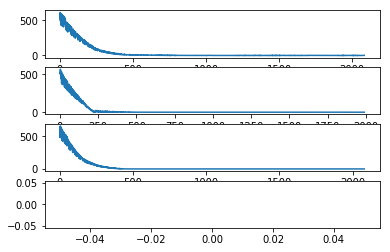

5 0.0005 0.001 0.001
{'38A': {'c': (-0.44062656, 0.27453221200584493), 'p': (0.43114704, 0.2861937655441642), 'f': (-0.44184986, 0.273044709630894)}}
c
[61.765667, 12.521838, 3.6894162, 2.3283675, 2.2781549, 1.8946514, 2.5058005, 2.4900427] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[-9.301644, 0.011001557, 0.75990033, 0.7886175, 0.83805424, 0.66119784, 0.8334852, 0.8654003] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[45.724895, 1.0205984, 0.3799371, 0.48925793, 0.60803765, 0.49538004, 0.744733, 0.69014037] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
610.3954
564.96045
661.76904
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


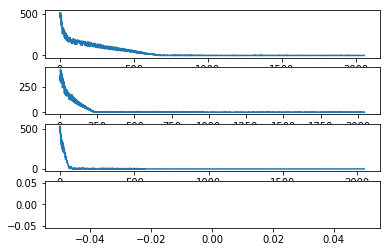

5 0.0005 0.001 0.005
{'38A': {'c': (-0.46850726, 0.2416302863019408), 'p': (0.37642512, 0.35804110104416365), 'f': (0.37510642, 0.35986469895356893)}}
c
[98.3262, 57.47503, -0.59413695, 2.5657778, 1.8115532, 3.008191, 3.4036362, 2.2473934] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[0.8295089, -4.962589, 5.865457, 0.4037453, 3.7770462, 0.5822272, 0.27325407, 1.9093512] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[-4.2388005, 1.4169925, 0.56171924, 0.662655, 1.0756435, 0.7099754, 0.64870155, 0.9285706] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
518.70074
426.52856
534.5935
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


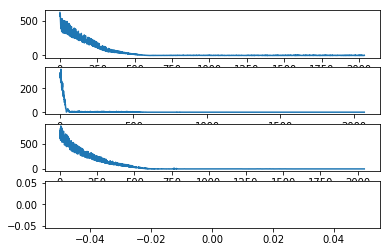

5 0.0005 0.005 0.001
{'38A': {'c': (-0.44121033, 0.2738218649419235), 'p': (-0.16522615, 0.6957930742869465), 'f': (-0.37906608, 0.3544016393786467)}}
c
[105.13694, 21.842598, 1.8822181, 0.12230318, 1.6208472, 0.4559889, 0.9783068, 0.6190623] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[7.239274, 3.6545353, 4.029735, 0.8966963, 0.79298604, 0.81901675, 0.85864156, 0.9194986] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[176.22357, 44.634953, 12.850949, -0.20666844, 2.5912137, -0.103371516, 0.7579733, -0.16215456] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
622.94965
359.6972
862.7599
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


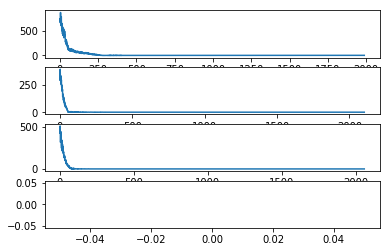

5 0.0005 0.005 0.005
{'38A': {'c': (-0.46470723, 0.2459905233539381), 'p': (-0.09467166, 0.823548432000867), 'f': (0.32131, 0.4377245731377338)}}
c
[8.524688, 1.2729509, 0.48271668, 0.60807097, 0.72345513, 0.83171654, 0.94340736, 1.0592953] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[0.62295234, 0.8193157, 0.76337767, 0.87831455, 0.8060012, 0.7717581, 0.90396124, 0.8902854] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[-0.047654383, 0.5126852, 0.57398045, 0.6703107, 0.67574763, 0.64359385, 0.67360944, 0.67940253] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
867.1835
393.83112
513.6965
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


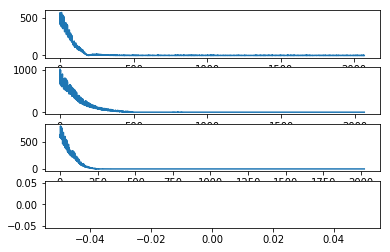

5 0.001 0.001 0.001
{'38A': {'c': (0.3920371, 0.33677448784546193), 'p': (-0.36014512, 0.3808463986588428), 'f': (0.20981947, 0.6179824247143203)}}
c
[-8.255169, 1.8218684, 0.92453855, 1.300842, 1.4816287, 1.6366467, 1.7588849, 1.898537] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[62.115936, 0.488194, 8.301294, 0.10847923, 0.25282758, 0.34524083, 0.4694414, 0.5864358] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[-0.39320993, 1.619162, 0.48361558, 0.50730133, 0.5259628, 0.5428487, 0.56978166, 0.62549484] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
569.56366
1013.57104
797.2477
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


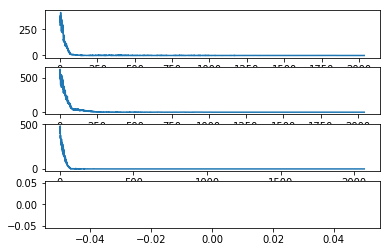

5 0.001 0.001 0.005
{'38A': {'c': (0.3128115, 0.4506164397005664), 'p': (-0.10249963, 0.8091550560338157), 'f': (0.23984195, 0.5672446060670655)}}
c
[1.1811607, 2.180717, 1.7870417, 2.0885437, 3.1415203, 3.5755458, 2.5830495, 2.0571938] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[2.2613487, 3.1917093, 1.0022525, 0.5827784, 1.6905276, 1.3753774, 0.5916102, 0.22827923] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[0.09625521, 0.7244109, 0.5129368, 0.50690955, 0.8914337, 0.90223694, 0.58793116, 0.5282505] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
410.6384
627.8744
483.18005
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


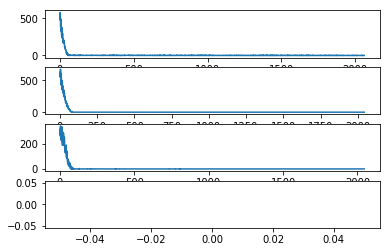

5 0.001 0.005 0.001
{'38A': {'c': (0.6676714, 0.0704076231844356), 'p': (0.6389634, 0.08809369719621897), 'f': (0.8649753, 0.005547909619117372)}}
c
[0.47516486, 0.7197405, 3.3249347, 1.2117152, 1.4221182, 1.5934461, 1.7406085, 1.8612484] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[0.2688979, 0.647496, 2.6842487, 0.88441557, 0.8898258, 0.7622985, 0.90631264, 0.88256323] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[0.60672015, 0.54997766, 3.3427052, 0.5856369, 0.6354794, 0.6463994, 0.6534789, 0.6834055] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
576.5341
673.8153
342.27182
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


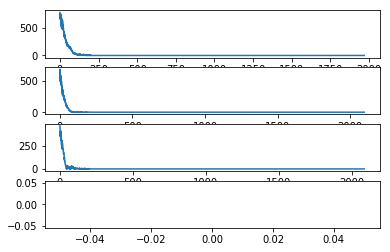

5 0.001 0.005 0.005
{'38A': {'c': (0.63881963, 0.08818811077818237), 'p': (0.63796794, 0.08874863139760963), 'f': (0.01339672, 0.974884154506767)}}
c
[1.9939804, 2.1418266, 3.4069762, 2.3404527, 3.0805354, 3.6386247, 2.2186682, 2.0984197] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[0.67997456, 0.59007925, 1.0976951, 0.5631274, 1.2715266, 1.0838563, 0.5616157, 0.7468621] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[0.7383353, 0.66875887, 0.61416036, 0.59884286, 0.89507514, 0.7489972, 0.5733583, 0.4788381] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
775.08075
683.3011
462.11978
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


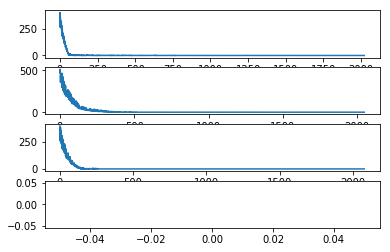

5 0.005 0.001 0.001
{'38A': {'c': (0.8260673, 0.01149843831188854), 'p': (-0.27999735, 0.5017988333318018), 'f': (0.7431901, 0.0346058022414484)}}
c
[-0.71462035, 3.473225, 6.1035852, 1.4423327, 3.5879672, 3.0320244, 1.4262282, 1.5981464] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[9.797969, 1.5680788, 2.7910855, 0.022191375, 1.4474667, 0.58485633, 0.18066892, 0.3540376] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[-0.50243706, 0.92222124, 1.2865089, 0.30512285, 1.0064309, 0.6589868, 0.34723133, 0.42091417] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
405.22937
515.09155
392.18503
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


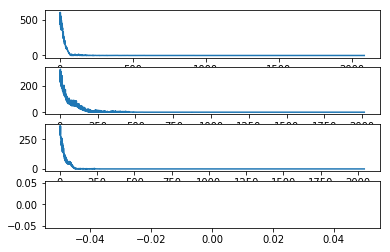

5 0.005 0.001 0.005
{'38A': {'c': (0.83241665, 0.010336815532971829), 'p': (-0.24348168, 0.5611939594497349), 'f': (0.54315555, 0.16415644073342697)}}
c
[1.758759, 1.6019818, 4.5502014, 2.05537, 3.5843217, 3.2617795, 2.165612, 1.8307296] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[4.096048, 1.20065, 1.7790701, 0.65455985, 1.1476017, 0.895777, 0.75492656, 0.6343571] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[-0.59154713, 0.6507007, 0.82737565, 0.68227786, 0.8229251, 0.8978038, 0.4534058, 0.55745655] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
607.7323
326.81918
364.01556
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


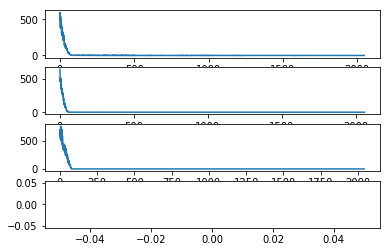

5 0.005 0.005 0.001
{'38A': {'c': (0.28776416, 0.48948877035867205), 'p': (-0.12912168, 0.7605743593529191), 'f': (-0.69674534, 0.05482521019095217)}}
c
[0.5644875, 1.6505986, 2.0636246, 2.4382777, 2.2621384, 2.488279, 2.4773307, 2.425878] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[0.58835006, 0.80597615, 0.78929216, 0.855728, 0.9171818, 0.74327546, 0.9635298, 0.882717] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[0.69422114, 0.68771607, 0.63272053, 0.6504275, 0.63754255, 0.64099705, 0.6486721, 0.68318146] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
593.72656
640.1734
762.70197
38A 0 [1, 2, 3, 4, 5, 6, 8]
38A 1 [0, 2, 3, 4, 5, 6, 8]
38A 2 [0, 1, 3, 4, 5, 6, 8]
38A 3 [0, 1, 2, 4, 5, 6, 8]
38A 4 [0, 1, 2, 3, 5, 6, 8]
38A 5 [0, 1, 2, 3, 4, 6, 8]
38A 6 [0, 1, 2, 3, 4, 5, 8]
38A 8 [0, 1, 2, 3, 4, 5, 6]


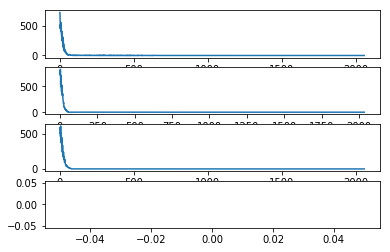

5 0.005 0.005 0.005
{'38A': {'c': (0.28891188, 0.48767975078072967), 'p': (-0.025235297, 0.9527039019247978), 'f': (0.17941263, 0.6707504701328819)}}
c
[0.76701766, 1.6832423, 2.0658112, 2.4658732, 2.2317567, 2.2470615, 2.2826493, 2.415274] [1.3237902, 2.4005573, 4.554092, 1.3237902, 4.554092, 2.4005573, 2.4005573, 2.4005573]
p
[0.56725335, 0.84865767, 0.74438393, 0.9026162, 0.8679687, 0.7945722, 0.91575, 0.83099836] [0.38003546, 0.7600709, 1.5201418, 0.7600709, 0.7600709, 1.5201418, 0.38003546, 0.7600709]
f
[0.33663505, 0.6047214, 0.57340467, 0.63744044, 0.67414707, 0.6515461, 0.68143815, 0.67685986] [0.32936406, 0.6587281, 1.3174562, 0.6587281, 0.6587281, 0.6587281, 0.6587281, 0.32936406]
727.90326
825.3685
609.2237


In [8]:
######################################
#training + parameter search
######################################



import tensorflow as tf
import numpy as np

#Y1=carbs     Y2=protein      Y3=fat


#options: X_value     X_Gau
Input_X = X_Gau

#loss => all default huber

#choose between L1SO vs. L1MO
scenario = 'L1MO'

L1MO_test_subs = ['38A']

neuron_shared_ls = [2, 3, 4, 5]

learning_rate_1_ls = [0.0005, 0.001, 0.005]

learning_rate_2_ls = [0.001, 0.005]

learning_rate_3_ls = [0.001, 0.005]




N_epochs = 111


#____________________________________________
#if not for grid search, can be commented out

for neurons_shared in neuron_shared_ls:
    for learning_rate_1 in learning_rate_1_ls:
        for learning_rate_2 in learning_rate_2_ls:
            for learning_rate_3 in learning_rate_3_ls:

                '''
                neurons_shared = 3
                learning_rate_1 = 0.001
                learning_rate_2 = 0.005
                learning_rate_3 = 0.005
                '''


                # ======================
                # Define the Graph
                # ======================

                # Define the Placeholders
                X = tf.placeholder("float", [None, Input_X.shape[1]], name="X")
                Y1 = tf.placeholder("float", [None, 1], name="Y1")
                Y2 = tf.placeholder("float", [None, 1], name="Y2")
                Y3 = tf.placeholder("float", [None, 1], name="Y3")

                # Define the weights for the layers
                initial_shared_layer_weights = np.random.rand(Input_X.shape[1],neurons_shared)
                initial_Y1_layer_weights = np.random.rand(neurons_shared,1)
                initial_Y2_layer_weights = np.random.rand(neurons_shared,1)
                initial_Y3_layer_weights = np.random.rand(neurons_shared,1)

                shared_layer_weights = tf.Variable(initial_shared_layer_weights, name="share_W", dtype="float32")
                Y1_layer_weights = tf.Variable(initial_Y1_layer_weights, name="share_Y1", dtype="float32")
                Y2_layer_weights = tf.Variable(initial_Y2_layer_weights, name="share_Y2", dtype="float32")
                Y3_layer_weights = tf.Variable(initial_Y3_layer_weights, name="share_Y3", dtype="float32")



                #Define the biases for the layers
                initial_shared_layer_bias = np.random.rand(neurons_shared,)
                initial_Y1_layer_bias = np.random.rand(1)
                initial_Y2_layer_bias = np.random.rand(1)
                initial_Y3_layer_bias = np.random.rand(1)

                shared_layer_bias = tf.Variable(initial_shared_layer_bias, name="share_B", dtype="float32")
                Y1_layer_bias = tf.Variable(initial_Y1_layer_bias, name="share_Y1_B", dtype="float32")
                Y2_layer_bias = tf.Variable(initial_Y2_layer_bias, name="share_Y2_B", dtype="float32")
                Y3_layer_bias = tf.Variable(initial_Y3_layer_bias, name="share_Y3_B", dtype="float32")



                # Construct the Layers with RELU Activations
                shared_layer = tf.nn.relu(tf.add(tf.matmul(X,shared_layer_weights), shared_layer_bias))
                #Y1_layer = tf.nn.relu(tf.add(tf.matmul(shared_layer,Y1_layer_weights), Y1_layer_bias))
                #Y2_layer = tf.nn.relu(tf.add(tf.matmul(shared_layer,Y2_layer_weights), Y2_layer_bias))
                #Y3_layer = tf.nn.relu(tf.add(tf.matmul(shared_layer,Y3_layer_weights), Y3_layer_bias))
                Y1_layer = tf.add(tf.matmul(shared_layer,Y1_layer_weights), Y1_layer_bias)
                Y2_layer = tf.add(tf.matmul(shared_layer,Y2_layer_weights), Y2_layer_bias)
                Y3_layer = tf.add(tf.matmul(shared_layer,Y3_layer_weights), Y3_layer_bias)




                # Calculate Loss
                #Y1_Loss = tf.nn.l2_loss(Y1-Y1_layer)
                #Y1_Loss = tf.norm(Y1-Y1_layer, ord= 1)
                #Y1_Loss = tf.losses.mean_squared_error(Y1, Y1_layer)
                Y1_Loss = tf.losses.huber_loss(Y1, Y1_layer)
                #Y1_Loss = tf.keras.losses.logcosh(Y1, Y1_layer)

                #Y2_Loss = tf.nn.l2_loss(Y2-Y2_layer)
                #Y2_Loss = tf.norm(Y2-Y2_layer, ord= 1)
                #Y2_Loss = tf.losses.mean_squared_error(Y2, Y2_layer)
                Y2_Loss = tf.losses.huber_loss(Y2, Y2_layer)

                #Y3_Loss = tf.nn.l2_loss(Y3-Y3_layer)
                #Y3_Loss = tf.norm(Y3-Y3_layer, ord= 1)
                #Y3_Loss = tf.losses.mean_squared_error(Y3, Y3_layer)
                Y3_Loss = tf.losses.huber_loss(Y3, Y3_layer)

                Joint_Loss = Y1_Loss + Y2_Loss + Y3_Loss

                # optimisers
                Optimiser = tf.train.AdamOptimizer().minimize(Joint_Loss)
                Y1_op = tf.train.AdamOptimizer(learning_rate=learning_rate_1, beta1=0.9, beta2=0.999, epsilon=1e-08).minimize(Y1_Loss)
                Y2_op = tf.train.AdamOptimizer(learning_rate=learning_rate_2, beta1=0.9, beta2=0.999, epsilon=1e-08).minimize(Y2_Loss)
                Y3_op = tf.train.AdamOptimizer(learning_rate=learning_rate_3, beta1=0.9, beta2=0.999, epsilon=1e-08).minimize(Y3_Loss)










                #__________________________________________________________________________________________________________
                # Joint Training
                # Calculation (Session) Code
                # ==========================

                # open the session
                session = tf.InteractiveSession()




                ############### L1SO ####################
                if scenario == 'L1SO':

                    sub_to_correlation = {}


                    for test_sub in ['38A', '38B', '38C', '38D', '38E', '38F', '38H']: 


                        if test_sub not in sub_to_correlation:
                            sub_to_correlation[test_sub] = {}


                        Y1_loss_list = []
                        Y2_loss_list = []
                        Y3_loss_list = []
                        Joint_loss_list = []


                        session.run(tf.global_variables_initializer())


                        #######  training phase  ###########
                        for i in range(1, N_epochs):


                            train_meal_idx = []
                            for one_sub in sub_meal_idx:
                                if one_sub != test_sub:
                                    train_meal_idx += sub_meal_idx[one_sub]

                            random.shuffle(train_meal_idx)


                            #each meal will be one batch, and only update one out of three loss
                            for meal_idx in train_meal_idx:
                                rand_nb = np.random.rand()
                                if rand_nb < 0.25:
                                    _, Y1_loss = session.run([Y1_op, Y1_Loss],
                                                    {
                                                      X: Input_X[meal_idx, :].reshape(-1,Input_X.shape[1]),
                                                      Y1: Y1_value[meal_idx, :].reshape(-1,1),
                                                      Y2: Y2_value[meal_idx, :].reshape(-1,1),
                                                      Y3: Y3_value[meal_idx, :].reshape(-1,1)
                                                      })

                                    Y1_loss_list += [float(str(Y1_loss))]

                                elif 0.25 <= rand_nb < 0.5:
                                    _, Y2_loss = session.run([Y2_op, Y2_Loss],
                                                    {
                                                      X: Input_X[meal_idx, :].reshape(-1,Input_X.shape[1]),
                                                      Y1: Y1_value[meal_idx, :].reshape(-1,1),
                                                      Y2: Y2_value[meal_idx, :].reshape(-1,1),
                                                      Y3: Y3_value[meal_idx, :].reshape(-1,1)
                                                      })

                                    Y2_loss_list += [float(str(Y2_loss))]

                                elif 0.5 <= rand_nb < 0.75:
                                    _, Y3_loss = session.run([Y3_op, Y3_Loss],
                                                    {
                                                      X: Input_X[meal_idx, :].reshape(-1,Input_X.shape[1]),
                                                      Y1: Y1_value[meal_idx, :].reshape(-1,1),
                                                      Y2: Y2_value[meal_idx, :].reshape(-1,1),
                                                      Y3: Y3_value[meal_idx, :].reshape(-1,1)
                                                      })

                                    Y3_loss_list += [float(str(Y3_loss))]

                                else:
                                    _, Joint_loss = session.run([Optimiser, Joint_Loss],
                                                    {
                                                      X: Input_X[meal_idx, :].reshape(-1,Input_X.shape[1]),
                                                      Y1: Y1_value[meal_idx, :].reshape(-1,1),
                                                      Y2: Y2_value[meal_idx, :].reshape(-1,1),
                                                      Y3: Y3_value[meal_idx, :].reshape(-1,1)
                                                      })
                                    Joint_loss_list += [float(str(Joint_loss))]



                            if i % 2000 == 0:
                                print('y1 loss: ', Y1_loss, end=' |')
                                print('y2 loss: ', Y2_loss, end=' |')
                                print('y3 loss: ', Y3_loss, end=' |')
                                print('joint loss: ', Joint_loss)



                        #######  testing phase  ###########
                        all_pred = []
                        all_true = []

                        for test_meal in sub_meal_idx[test_sub]:
                            Y1_pred, Y2_pred, Y3_pred = session.run([Y1_layer,Y2_layer,Y3_layer], {
                                                  X: Input_X[test_meal].reshape(-1,Input_X.shape[1]),
                                                  Y1: Y1_value[test_meal].reshape(-1,1),
                                                  Y2: Y2_value[test_meal].reshape(-1,1),
                                                  Y3: Y3_value[test_meal].reshape(-1,1)
                                                  })
                            all_pred += [[Y1_pred[0][0], Y2_pred[0][0], Y3_pred[0][0]]]
                            all_true += [[Y1_value[test_meal][0], Y2_value[test_meal][0], Y3_value[test_meal][0]]]



                        #######  plotting phase  ###########
                        corr_cx = []
                        corr_cy = []
                        corr_px = []
                        corr_py = []
                        corr_fx = []
                        corr_fy = []


                        for meal_num in range(len(all_true)):
                            corr_cx.append(all_pred[meal_num][0])
                            corr_cy.append(all_true[meal_num][0])

                            corr_px.append(all_pred[meal_num][1])
                            corr_py.append(all_true[meal_num][1])

                            corr_fx.append(all_pred[meal_num][2])
                            corr_fy.append(all_true[meal_num][2])    

                        sub_to_correlation[test_sub] = {'c':scipy.stats.pearsonr(corr_cx,corr_cy),
                                                        'p':scipy.stats.pearsonr(corr_px,corr_py),
                                                        'f':scipy.stats.pearsonr(corr_fx,corr_fy)}

                        
                       
                        
                        
                        plt.subplot(411)
                        plt.plot(Y1_loss_list)
                        plt.subplot(412)
                        plt.plot(Y2_loss_list)
                        plt.subplot(413)
                        plt.plot(Y3_loss_list)
                        plt.subplot(414)
                        plt.plot(Joint_loss_list)
                        plt.show()
                        
                        
                    print(neurons_shared, learning_rate_1, learning_rate_2, learning_rate_3) 
                    print(sub_to_correlation)
                        

                    print(max(Y1_loss_list))
                    print(max(Y2_loss_list))  
                    print(max(Y3_loss_list))



                ################# L1MO ####################       
                elif scenario == 'L1MO':

                    sub_to_correlation = {}

                    #for test_sub in ['38A', '38B', '38C', '38D', '38E', '38F', '38H']: 
                    #for test_sub in ['38B']: 
                    for test_sub in L1MO_test_subs:

                        if test_sub not in sub_to_correlation:
                             sub_to_correlation[test_sub] = {}


                        Y1_loss_list = []
                        Y2_loss_list = []
                        Y3_loss_list = []
                        Joint_loss_list = []

                        session.run(tf.global_variables_initializer())

                        all_meal_pred = []
                        all_meal_true = []

                        for test_meal in sub_meal_idx[test_sub]:

                            #create training indexes
                            train_meal_idxes = []
                            for meal_index in sub_meal_idx[test_sub]:
                                if meal_index != test_meal:
                                    train_meal_idxes.append(meal_index) 

                            print(test_sub, test_meal, train_meal_idxes)
                            random.shuffle(train_meal_idxes)


                            #######  training phase  ###########
                            for i in range(1,N_epochs):
                                for meal_idx in train_meal_idxes:

                                    rand_nb = np.random.rand()
                                    if rand_nb < 0.333:
                                        _, Y1_loss = session.run([Y1_op, Y1_Loss],
                                                        {
                                                          X: Input_X[meal_idx, :].reshape(-1,Input_X.shape[1]),
                                                          Y1: Y1_value[meal_idx, :].reshape(-1,1),
                                                          Y2: Y2_value[meal_idx, :].reshape(-1,1),
                                                          Y3: Y3_value[meal_idx, :].reshape(-1,1)
                                                          })

                                        Y1_loss_list += [float(str(Y1_loss))]

                                    elif 0.333 <= rand_nb < 0.666:
                                        _, Y2_loss = session.run([Y2_op, Y2_Loss],
                                                        {
                                                          X: Input_X[meal_idx, :].reshape(-1,Input_X.shape[1]),
                                                          Y1: Y1_value[meal_idx, :].reshape(-1,1),
                                                          Y2: Y2_value[meal_idx, :].reshape(-1,1),
                                                          Y3: Y3_value[meal_idx, :].reshape(-1,1)
                                                          })

                                        Y2_loss_list += [float(str(Y2_loss))]

                                    elif 0.666 <= rand_nb < 0.999:
                                        _, Y3_loss = session.run([Y3_op, Y3_Loss],
                                                        {
                                                          X: Input_X[meal_idx, :].reshape(-1,Input_X.shape[1]),
                                                          Y1: Y1_value[meal_idx, :].reshape(-1,1),
                                                          Y2: Y2_value[meal_idx, :].reshape(-1,1),
                                                          Y3: Y3_value[meal_idx, :].reshape(-1,1)
                                                          })

                                        Y3_loss_list += [float(str(Y3_loss))]

                                    '''    
                                    else:
                                        _, Joint_loss = session.run([Optimiser, Joint_Loss],
                                                        {
                                                          X: Input_X[meal_idx, :].reshape(-1,Input_X.shape[1]),
                                                          Y1: Y1_value[meal_idx, :].reshape(-1,1),
                                                          Y2: Y2_value[meal_idx, :].reshape(-1,1),
                                                          Y3: Y3_value[meal_idx, :].reshape(-1,1)
                                                          })
                                        Joint_loss_list += [float(str(Joint_loss))]
                                    '''


                            if i % 50 == 0:
                                print('y1 loss: ', Y1_loss, end=' |')
                                print('y2 loss: ', Y2_loss, end=' |')
                                print('y3 loss: ', Y3_loss, end=' |')
                                print('joint loss: ', Joint_loss)



                            #######  testing phase  ###########
                            Y1_pred, Y2_pred, Y3_pred = session.run([Y1_layer,Y2_layer,Y3_layer], {
                                                  X: Input_X[test_meal].reshape(-1,Input_X.shape[1]),
                                                  Y1: Y1_value[test_meal].reshape(-1,1),
                                                  Y2: Y2_value[test_meal].reshape(-1,1),
                                                  Y3: Y3_value[test_meal].reshape(-1,1)
                                                  })

                            all_meal_pred += [[Y1_pred[0][0], Y2_pred[0][0], Y3_pred[0][0]]]
                            all_meal_true += [[Y1_value[test_meal][0], Y2_value[test_meal][0], Y3_value[test_meal][0]]]


                        #######  plotting phase  ###########
                        corr_cx = []
                        corr_cy = []
                        corr_px = []
                        corr_py = []
                        corr_fx = []
                        corr_fy = []


                        for meal_num in range(len(all_meal_true)):
                            corr_cx.append(all_meal_pred[meal_num][0])
                            corr_cy.append(all_meal_true[meal_num][0])

                            corr_px.append(all_meal_pred[meal_num][1])
                            corr_py.append(all_meal_true[meal_num][1])

                            corr_fx.append(all_meal_pred[meal_num][2])
                            corr_fy.append(all_meal_true[meal_num][2])    

                        sub_to_correlation[test_sub] = {'c':scipy.stats.pearsonr(corr_cx,corr_cy),
                                                        'p':scipy.stats.pearsonr(corr_px,corr_py),
                                                        'f':scipy.stats.pearsonr(corr_fx,corr_fy)}

                        

                        plt.subplot(411)
                        plt.plot(Y1_loss_list)
                        plt.subplot(412)
                        plt.plot(Y2_loss_list)
                        plt.subplot(413)
                        plt.plot(Y3_loss_list)
                        plt.subplot(414)
                        plt.plot(Joint_loss_list)
                        plt.show()

                    print(neurons_shared, learning_rate_1, learning_rate_2, learning_rate_3)    
                    print(sub_to_correlation)
                        
                    print('c')
                    print(corr_cx, corr_cy)
                    print('p')
                    print(corr_px, corr_py)
                    print('f')
                    print(corr_fx, corr_fy) 
                        

                    print(max(Y1_loss_list))
                    print(max(Y2_loss_list))  
                    print(max(Y3_loss_list))


session.close()
from numba import cuda
cuda.select_device(0)
cuda.close()

In [9]:
sub_to_correlation

{'38A': {'c': (0.28891188, 0.48767975078072967),
  'p': (-0.025235297, 0.9527039019247978),
  'f': (0.17941263, 0.6707504701328819)}}

In [10]:
type(sub_to_correlation['38A']['c'][1])

numpy.float64

In [11]:
train_meal_idxes

[0, 2, 5, 6, 3, 1, 4]

In [12]:
test_sub

'38A'

In [13]:
sub_to_correlation

{'38A': {'c': (0.28891188, 0.48767975078072967),
  'p': (-0.025235297, 0.9527039019247978),
  'f': (0.17941263, 0.6707504701328819)}}

In [14]:
print(session.run(Joint_Loss, {
                          X: Input_X[sub_meal_idx[test_sub][2]].reshape(-1,Input_X.shape[1]),
                          Y1: Y1_value[sub_meal_idx[test_sub][2]].reshape(-1,1),
                          Y2: Y2_value[sub_meal_idx[test_sub][2]].reshape(-1,1),
                          Y3: Y3_value[sub_meal_idx[test_sub][2]].reshape(-1,1)
                          }))

RuntimeError: Attempted to use a closed Session.

In [ ]:
all_pred = []
all_true = []


for test_meal in sub_meal_idx[test_sub]:
    Y1_pred, Y2_pred, Y3_pred = session.run([Y1_layer,Y2_layer,Y3_layer], {
                          X: Input_X[test_meal].reshape(-1,Input_X.shape[1]),
                          Y1: Y1_value[test_meal].reshape(-1,1),
                          Y2: Y2_value[test_meal].reshape(-1,1),
                          Y3: Y3_value[test_meal].reshape(-1,1)
                          })
    all_pred += [[Y1_pred[0][0], Y2_pred[0][0], Y3_pred[0][0]]]
    all_true += [[Y1_value[test_meal][0], Y2_value[test_meal][0], Y3_value[test_meal][0]]]
    print(Y1_pred, Y2_pred, Y3_pred)
    print(Y1_value[test_meal], Y2_value[test_meal], Y3_value[test_meal])

In [ ]:
all_pred

In [ ]:
all_true

In [ ]:
corr_cx = []
corr_cy = []
corr_px = []
corr_py = []
corr_fx = []
corr_fy = []


for meal_num in range(len(all_true)):
    corr_cx.append(all_pred[meal_num][0])
    corr_cy.append(all_true[meal_num][0])
    
    corr_px.append(all_pred[meal_num][1])
    corr_py.append(all_true[meal_num][1])
    
    corr_fx.append(all_pred[meal_num][2])
    corr_fy.append(all_true[meal_num][2])

In [ ]:
scipy.stats.pearsonr(corr_cx,corr_cy)

In [ ]:
scipy.stats.pearsonr(corr_px,corr_py)

In [ ]:
scipy.stats.pearsonr(corr_fx,corr_fy)